In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [2]:
df=pd.read_csv("rdf.csv")

In [4]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [7]:
x=df.drop("stroke",axis=1)
y=df.stroke

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [9]:
lgbm_model=LGBMClassifier().fit(x_train,y_train)

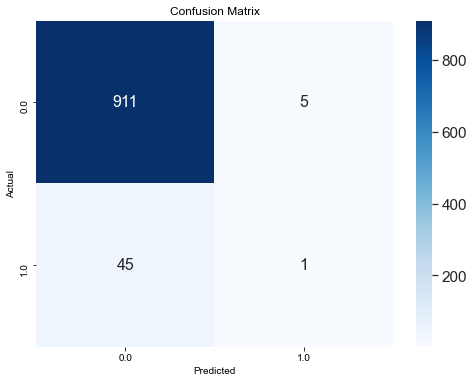

SCORES
accuracy_score:0.9480249480249481
f1_score:0.03846153846153846

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       916
         1.0       0.17      0.02      0.04        46

    accuracy                           0.95       962
   macro avg       0.56      0.51      0.51       962
weighted avg       0.92      0.95      0.93       962



In [10]:
y_pred=lgbm_model.predict(x_test)

import matplotlib.pyplot as plt
def plot_confusion_matrix(true_y, pred_y, title='Confusion Matrix', figsize=(8,6)):
    """ Custom function for plotting a confusion matrix for predicted results """
    conf_matrix = confusion_matrix(true_y, pred_y)
    conf_df = pd.DataFrame(conf_matrix, columns=np.unique(true_y), index = np.unique(true_y))
    conf_df.index.name = 'Actual'
    conf_df.columns.name = 'Predicted'
    plt.figure(figsize = figsize)
    plt.title(title)
    sns.set(font_scale=1.4)
    sns.heatmap(conf_df, cmap="Blues", annot=True, 
                annot_kws={"size": 16}, fmt='g')
    plt.show()
    return
plot_confusion_matrix(y_test,y_pred)

ascore=accuracy_score(y_test,y_pred)
f1score=f1_score(y_test,y_pred)

print("SCORES")
print("""accuracy_score:{}
f1_score:{}
""".format(ascore,f1score))

print(classification_report(y_test,y_pred))

In [11]:
lgbm_model=LGBMClassifier(class_weight="balanced").fit(x_train,y_train)

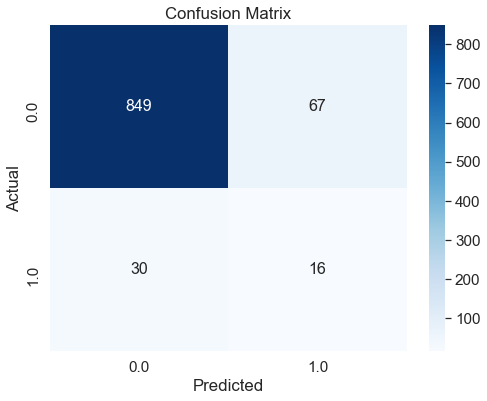

SCORES
accuracy_score:0.8991683991683992
f1_score:0.24806201550387602

              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95       916
         1.0       0.19      0.35      0.25        46

    accuracy                           0.90       962
   macro avg       0.58      0.64      0.60       962
weighted avg       0.93      0.90      0.91       962



In [12]:
y_pred=lgbm_model.predict(x_test)

import matplotlib.pyplot as plt
def plot_confusion_matrix(true_y, pred_y, title='Confusion Matrix', figsize=(8,6)):
    """ Custom function for plotting a confusion matrix for predicted results """
    conf_matrix = confusion_matrix(true_y, pred_y)
    conf_df = pd.DataFrame(conf_matrix, columns=np.unique(true_y), index = np.unique(true_y))
    conf_df.index.name = 'Actual'
    conf_df.columns.name = 'Predicted'
    plt.figure(figsize = figsize)
    plt.title(title)
    sns.set(font_scale=1.4)
    sns.heatmap(conf_df, cmap="Blues", annot=True, 
                annot_kws={"size": 16}, fmt='g')
    plt.show()
    return
plot_confusion_matrix(y_test,y_pred)

ascore=accuracy_score(y_test,y_pred)
f1score=f1_score(y_test,y_pred)

print("SCORES")
print("""accuracy_score:{}
f1_score:{}
""".format(ascore,f1score))

print(classification_report(y_test,y_pred))

In [13]:
## class weight has better performence than oversampling

In [14]:
wei=np.linspace(0,0.99,1000)

In [17]:
wei_grid={"class_weight":[{0:w,1:1.0-w} for w in wei]}

In [24]:
from sklearn.model_selection import StratifiedKFold

lgbm_cv_model=GridSearchCV(lgbm_model,wei_grid,
                           verbose=2,n_jobs=-1,
                           cv=StratifiedKFold(),
                           scoring="f1").fit(x_train,y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


In [25]:
lgbm_cv_model.best_params_

{'class_weight': {0: 0.04360360360360361, 1: 0.9563963963963964}}

In [26]:
lgbm_tuned=LGBMClassifier(class_weight={0:0.04,1:0.96}).fit(x_train,y_train)

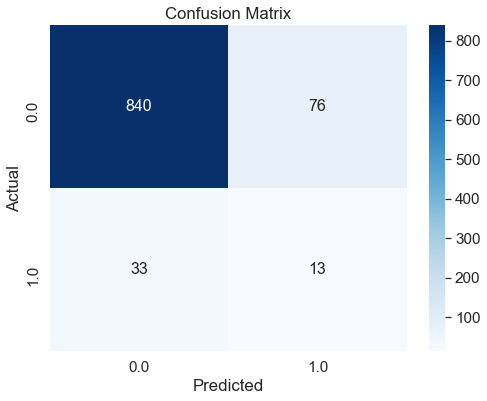

SCORES
accuracy_score:0.8866943866943867
f1_score:0.19259259259259262

              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94       916
         1.0       0.15      0.28      0.19        46

    accuracy                           0.89       962
   macro avg       0.55      0.60      0.57       962
weighted avg       0.92      0.89      0.90       962



In [27]:
y_pred=lgbm_tuned.predict(x_test)

import matplotlib.pyplot as plt
def plot_confusion_matrix(true_y, pred_y, title='Confusion Matrix', figsize=(8,6)):
    """ Custom function for plotting a confusion matrix for predicted results """
    conf_matrix = confusion_matrix(true_y, pred_y)
    conf_df = pd.DataFrame(conf_matrix, columns=np.unique(true_y), index = np.unique(true_y))
    conf_df.index.name = 'Actual'
    conf_df.columns.name = 'Predicted'
    plt.figure(figsize = figsize)
    plt.title(title)
    sns.set(font_scale=1.4)
    sns.heatmap(conf_df, cmap="Blues", annot=True, 
                annot_kws={"size": 16}, fmt='g')
    plt.show()
    return
plot_confusion_matrix(y_test,y_pred)

ascore=accuracy_score(y_test,y_pred)
f1score=f1_score(y_test,y_pred)

print("SCORES")
print("""accuracy_score:{}
f1_score:{}
""".format(ascore,f1score))

print(classification_report(y_test,y_pred))

In [28]:
### default version was better